In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path(sys.argv[0]).absolute().parent.parent.parent.parent))
# add the entire folder to path

In [2]:
from src.utils import utils
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# we should use the date of the raw file
now = "2022-10-26"
raw_path = f"../data/raw/{now}_hiscore_data.parquet.gzip"
calculated_path = f"../data/calculated/{now}_"

In [8]:
df = pd.read_parquet(raw_path)
df.head()

,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
Player_id,,,,,,,,,,,,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-12-19 05:02:57,0,0,1,Real_Player,not banned,59568395,2022-12-19 05:04:16,...,0.0,0.0,0,0,0,0,0,0,0,0
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-12-19 00:36:08,0,0,1,Real_Player,not banned,59622273,2022-12-19 00:36:09,...,0.0,0.0,0,10,0,0,114,73,0,1256
29,59DCFCAFC1F3DF3326F36E7A39B741FC,2021-03-14 22:17:16,2022-12-18 09:04:21,0,0,1,Real_Player,not banned,292513577,2022-12-18 09:04:23,...,0.0,0.0,0,0,0,0,0,0,0,0
39,1C74EFD6CE51790D7BF65A94F47675B5,2021-03-14 22:17:23,2022-12-18 14:48:44,0,0,1,Real_Player,not banned,59503415,2022-12-18 14:48:52,...,234.0,0.0,0,0,0,0,279,1526,145,0
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-12-19 01:23:32,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0.0,0.0,0,20,0,0,1000,500,0,400


In [11]:
df_skill_ratio = pd.read_parquet(f"{calculated_path}skill_ratios.parquet.gzip")
df_boss_ratio = pd.read_parquet(f"{calculated_path}boss_ratios.parquet.gzip")
df_minigames_ratio = pd.read_parquet(f"{calculated_path}minigame_ratios.parquet.gzip")

In [14]:
_df = df[utils.HISCORE_COLUMNS].copy()
_df = _df.merge(df_skill_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_boss_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_minigames_ratio, left_index=True, right_index=True).copy()
_df["bot"] = np.where(df["account_status"] == "banned", 1, 0)
_df

,total,attack,defence,strength,hitpoints,ranged,prayer,magic,cooking,woodcutting,...,lms_rank_ratio,soul_wars_zeal_ratio,cs_all_ratio,cs_beginner_ratio,cs_easy_ratio,cs_medium_ratio,cs_hard_ratio,cs_elite_ratio,cs_master_ratio,bot
Player_id,,,,,,,,,,,,,,,,,,,,,
1,55978987,5491118,3358410,5789019,5237822,1877958,748453,3332131,13050181,947390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,249164755,14151880,13293654,15162818,25533323,19180307,13078638,14765780,13057071,13102209,...,0.329840,0.514797,0.077682,0.000000,0.002466,0.072750,0.001233,0.001233,0.000000,0
29,25751694,674007,0,3150582,2971492,2595141,131224,8527168,288072,442417,...,0.000000,0.000000,0.500000,0.390110,0.076923,0.021978,0.010989,0.000000,0.000000,0
39,330812384,14151599,13394289,14231093,23598761,20050347,13366234,12041324,15746067,9140223,...,0.231589,0.129226,0.319592,0.028254,0.148680,0.062066,0.049097,0.005558,0.025938,0
59,380812843,25789847,19279215,57396170,51308981,45806374,13037612,20373613,13144778,13051121,...,0.000000,0.000000,0.500000,0.023220,0.065015,0.083591,0.094427,0.196594,0.037152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49766405,38899515,1222728,1497164,1563387,7010515,14909991,836761,5077944,841847,620150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
49775805,11432596,450229,867427,650195,1103873,1197300,273873,3995877,410050,172397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
49776809,60733963,1813071,1988725,1639713,7752484,17441972,907412,19911039,383915,6859815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# measuring feature importance with xgboost

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from numpy import sort
import numpy as np

from xgboost import XGBClassifier

## train test split

In [21]:
_df = df[utils.HISCORE_COLUMNS].copy()
_df = _df.merge(df_skill_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_boss_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_minigames_ratio, left_index=True, right_index=True).copy()
_df["bot"] = np.where(df["account_status"] == "banned", 1, 0)

In [22]:
y = _df.pop("bot")
x = _df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42, test_size=0.8
)

# this is mostly to reduce the test size
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, random_state=42, test_size=0.7
)

## train xgboost classifier

In [23]:
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0:.2f}%")
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)

Accuracy: 97.51%


In [17]:
thresholds = list(set(thresholds)) # unique
thresholds = sort(thresholds)
len(thresholds)

131

## compare features based on xgb feature importance

In [ ]:
threshold_eval = list()
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	selection.feature_names_in_ = X_train.columns
	features = selection.get_feature_names_out()
	select_X_train = selection.transform(
		X_train,
	)

	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)

	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)

	print(f"Thresh={thresh:.3f}, n={len(features)}, Accuracy: {accuracy * 100.0:.2f}%")
	threshold_eval.append(
		{
			"Threshold": thresh,
			"amount_features": len(features),
			"features": features,
			"Accuracy": accuracy * 100.0,
		}
	)
# took 42 minutes to run

### look at the best features

In [ ]:
df_threshold_eval = pd.DataFrame(threshold_eval)
df_threshold_eval.features = df_threshold_eval.apply(lambda x: list(x.features), axis=1)
df_threshold_eval.tail(25)

In [ ]:
df_threshold_eval.iloc[-25].features

In [ ]:
eval_data = list()
for t in threshold_eval:
    t:dict
    features = t.get('features')
    balanced_accuracy = t.get('Accuracy') / t.get('amount_features')
    # print(balanced_accuracy, t.get('Accuracy'), t.get('amount_features'))
    for feature in features:
        data = {
            "feature": feature,
            "balanced_accuracy": balanced_accuracy
        }
        eval_data.append(data)
pd.DataFrame(eval_data).groupby(by=["feature"]).sum().sort_values(by=["balanced_accuracy"], ascending=False).head(25)

In [ ]:
keys = list(pd.DataFrame(eval_data).groupby(by=["feature"]).sum().sort_values(by=["balanced_accuracy"], ascending=False).head(25).index).sort()
keys

In [ ]:
# these are the keys i found
keys = [
    "cs_all_ratio",
    "cooking",
    "cs_all",
    "farming",
    "cooking_ratio",
    "firemaking",
    "ranged",
    "cs_beginner_ratio",
    "fletching_ratio",
    "fishing",
    "runecraft_ratio",
    "zalcano_ratio",
    "thieving",
    "woodcutting",
    "ranged_ratio",
    "fishing_ratio",
    "magic",
    "tzkal_zuk",
    "slayer_ratio",
    "magic_ratio",
    "woodcutting_ratio",
    "construction",
    "fletching",
    "zulrah_ratio",
    "dagannoth_rex",
]

## train a model with the best features

In [ ]:
_df = df[utils.HISCORE_COLUMNS].copy()
_df = _df.merge(df_skill_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_boss_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_minigames_ratio, left_index=True, right_index=True).copy()
_df["bot"] = np.where(df["account_status"] == "banned", 1, 0)

In [ ]:
y = _df.pop("bot")
x = _df[keys].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42, test_size=0.5
)

# this is mostly to reduce the test size
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, random_state=42, test_size=0.1
)

In [ ]:
# train model
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0:.2f}%")

# explain the model with Decision classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
_df = df[utils.HISCORE_COLUMNS].copy()
_df = _df.merge(df_skill_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_boss_ratio, left_index=True, right_index=True).copy()
_df = _df.merge(df_minigames_ratio, left_index=True, right_index=True).copy()
_df["bot"] = np.where(df["account_status"] == "banned", 1, 0)

## train test split

In [25]:
y = _df.pop("bot")
x = _df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42, test_size=0.5
)

# this is mostly to reduce the test size
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, random_state=42, test_size=0.1
)

## train Decision tree classifier

In [26]:
# fit model on all training data
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, max_leaf_nodes=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0:.2f}%")

Accuracy: 95.61%


## show decision tree

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 100))
tree.plot_tree(
    clf, 
    feature_names=X_train.columns, 
    class_names=["bot","human"],
    filled=True
)
plt.show()

## lookup the decision tree for a player

In [30]:
# feature[i] contains the feature used for splitting node i.
feature = clf.tree_.feature
# threshold[i] contains the threshold value at node i.
threshold = clf.tree_.threshold
# The decision_path method outputs an indicator matrix that allows us to retrieve the 
# nodes the samples of interest traverse through.
node_indicator = clf.decision_path(X_test)
# The apply method returns an array of the node ids of the leaves reached by each 
# sample of interest.
leaf_id = clf.apply(X_test)
# We also store the predicted labels for each sample.
y_pred = clf.predict(X_test)

In [31]:
player_id = [
    8,
    1
]
sample_id = 0

mask = (x.index.isin(player_id))
X_test = x[mask]
print(X_test.index)

# feature[i] contains the feature used for splitting node i.
feature = clf.tree_.feature
# threshold[i] contains the threshold value at node i.
threshold = clf.tree_.threshold
# The decision_path method outputs an indicator matrix that allows us to retrieve the 
# nodes the samples of interest traverse through.
node_indicator = clf.decision_path(X_test)
# The apply method returns an array of the node ids of the leaves reached by each 
# sample of interest.
leaf_id = clf.apply(X_test)
# We also store the predicted labels for each sample.
y_pred = clf.predict(X_test)

# We will show the decision path through which "sample_id" goes through.

node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print(f"Rules used to predict player_id {X_test.index[sample_id]}:")
for node_id in node_index:
    _label = ["human","bot"][y_pred[sample_id]]
    _value = X_test.iloc[sample_id, feature[node_id]]
    _feature = clf.feature_names_in_[feature[node_id]]
    _threshold = threshold[node_id]

    # We have reached the leaf, the path for this sample ends here.
    if leaf_id[sample_id] == node_id:
        print(f"leaf reached, label: {_label}")
        continue

    # Check if value of the split feature for sample 0 is below threshold.
    if _value <= _threshold:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        f"node {node_id}, feature: {_feature}, (actual value) {_value:_.2f} {threshold_sign} {_threshold:_} (threshold)"
    )

Int64Index([1, 8], dtype='int64', name='Player_id')
Rules used to predict player_id 1:
node 0, feature: cooking, (actual value) 13_050_181.00 > 373_041.5 (threshold)
node 2, feature: fletching_ratio, (actual value) 0.11 > 0.004690895089879632 (threshold)
node 4, feature: cs_all_ratio, (actual value) 0.00 <= 0.0036742412485182285 (threshold)
node 9, feature: fishing, (actual value) 2_421_193.00 > 386_656.5 (threshold)
node 30, feature: farming, (actual value) 292_110.00 <= 883_160.5 (threshold)
node 53, feature: ranged_ratio, (actual value) 0.03 <= 0.23026206344366074 (threshold)
node 69, feature: smithing, (actual value) 294_737.00 > 101_441.5 (threshold)
node 78, feature: cooking, (actual value) 13_050_181.00 > 1_791_328.0 (threshold)
leaf reached, label: human


# measure feature importance with forest.feature_importances_

In [32]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier


def plot_impurity(forest: RandomForestClassifier, columns: list, title:str):
    start_time = time.time()
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(importances, index=columns)
    forest_importances = forest_importances.sort_values()

    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 5))

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

base skills 0.9711846168895597
Elapsed time to compute the importances: 0.094 seconds


<Figure size 1200x500 with 0 Axes>

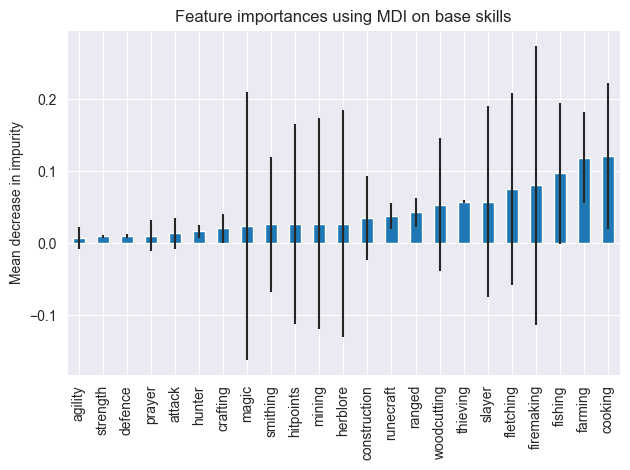

base bosses 0.8664458698416692
Elapsed time to compute the importances: 0.041 seconds


<Figure size 1200x500 with 0 Axes>

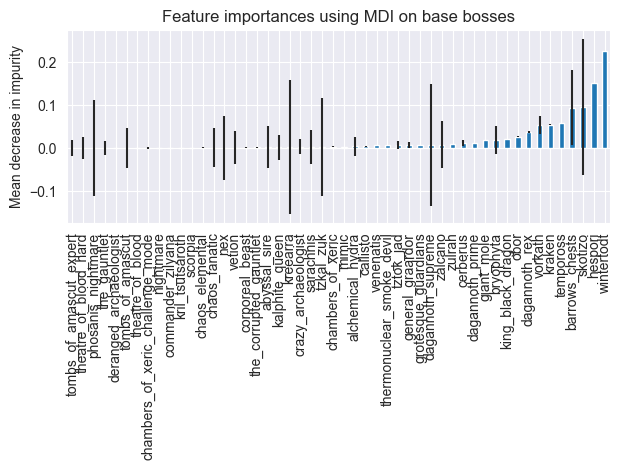

base minigames 0.8687237105046186
Elapsed time to compute the importances: 0.053 seconds


<Figure size 1200x500 with 0 Axes>

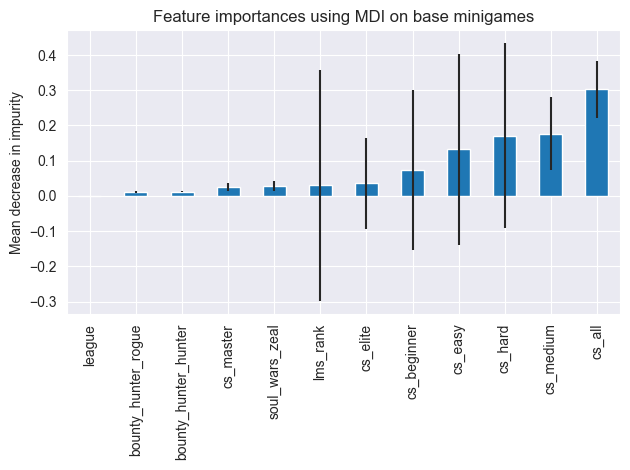

feature skill ratio 0.9630654425019913
Elapsed time to compute the importances: 0.039 seconds


<Figure size 1200x500 with 0 Axes>

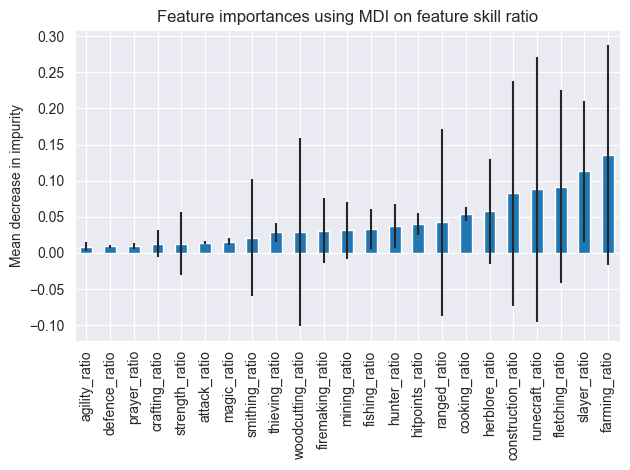

feature boss ratio 0.8640422588353667
Elapsed time to compute the importances: 0.034 seconds


<Figure size 1200x500 with 0 Axes>

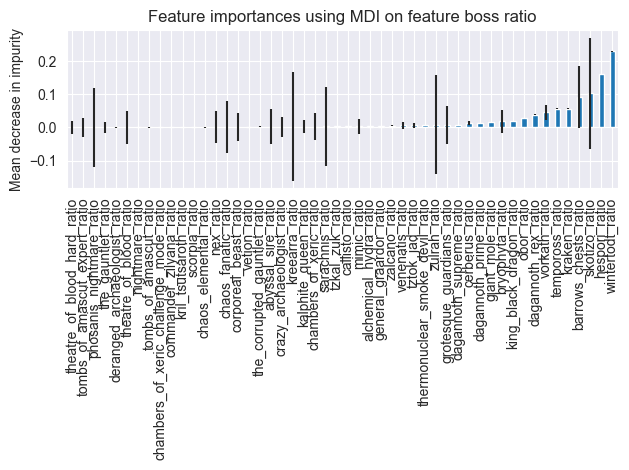

feature minigame ratio 0.8695202560125211
Elapsed time to compute the importances: 0.037 seconds


<Figure size 1200x500 with 0 Axes>

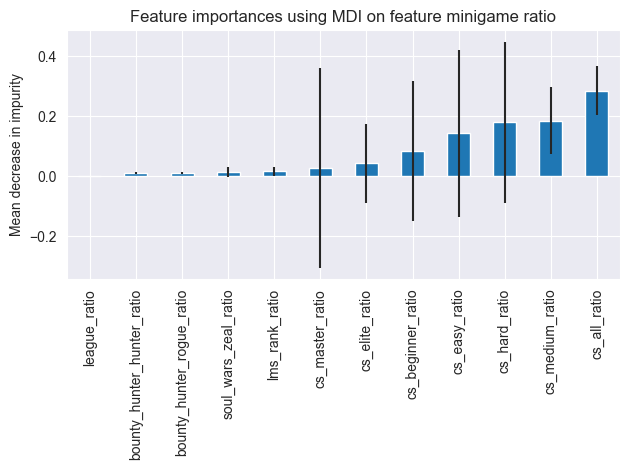

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = [
    # base
    (df[utils.SKILLS], "base skills"),
    (df[utils.BOSSES], "base bosses"),
    (df[utils.MINIGAMES], "base minigames"),
    # features
    (df_skill_ratio, "feature skill ratio"),
    (df_boss_ratio, "feature boss ratio"),
    (df_minigames_ratio, "feature minigame ratio"),
]

for feature, name in features:
    _df = df[["account_status"]].copy()
    _df = _df.merge(feature, left_index=True, right_index=True).copy()

    # split data (50,25,25) train 50%, test 25%, validation 25%
    y = _df.pop("account_status")
    x = _df.fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, stratify=y, random_state=42, test_size=0.5
    )
    X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, stratify=y_test, random_state=42, test_size=0.5
    )
    # print("split data")

    forest = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=0)
    forest.fit(X_train, y_train)
    # print("trained model")

    score = forest.score(X_test, y_test)
    print(name, score)  # just to get an idea if there is any relevance
    # print("impurity plot")
    title = f"Feature importances using MDI on {name}"
    plot_impurity(forest, columns=_df.columns, title=title)